## This is my project to learn machine learning starting off with Logistic Regression.

**Basic Approach for this project is to get the  Breast Cancer Dataset from kaggle.**

**Then train the model.**

**In between this i need to preprocess the dataset and many other problem need to be resolved.**

**Lets Start off**

**Based on the structure, it appears to be a breast cancer dataset with features such as:
ID: Identifier for each case
Diagnosis: Label indicating whether the tumor is malignant (M) or benign (B)
Radius_mean, Texture_mean, Perimeter_mean, etc.: Features related to the tumor's characteristics
Steps to Build the Breast Cancer Detection Model**

**1.Load the Dataset: Since your dataset seems to be structured as a CSV, let's start by loading it into a DataFrame using Pandas.**

**2.Data Preprocessing:Handle missing values (if any).**
Convert categorical labels (e.g., M, B) into numerical values.
Split the dataset into features (X) and labels (y).

**3.Data Splitting:**
Use train_test_split to divide the dataset into training and test sets.

**4.Model Building:**
You can use a classification model like Logistic Regression.

**5.Training:**
Train the model using the training data.

**6.Evaluation:**
Evaluate the model using metrics such as accuracy, precision, recall, and F1 score on the test data.
Let’s start with a simple example using Logistic Regression. Below is the code to get you started:



In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [109]:
## 2.Load the dataset and print first few rows

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Display the first few rows
print('Here are the first few data:')
#print(data.info())
print(data.head(10)) # prints first 10 rows




Here are the first few data:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840      

## 2. Now the dataset seems to be printed.
## Let's move on preprocessing where we clean unwanted  columns and modify dataset to train basically we refurbuish our dataset.
**1. Dropped the column id  which is not required.**

**2.Then modified the diagnosis column with malignant and benign into numerical values ie (M=1, B=0)** 

**3.Separate Features and Labels:
Action: X contains all columns except 'diagnosis' (features), while y is the 'diagnosis' column (target variable). Basically in this step i seperate the features and labels ie diagnosis.**
What does this 3rd Step do? 

**It is required to seperate or variable or parameters which depends to predict either the diagnosis is malignant or not so i seperated the label or prediction value. Based on multiple parameter we will diagnose breast cancer either it is malignant and benign**

**4.Split the Data:
Action: Divided the dataset into training (80%) and testing (20%) sets to train the model and evaluate its performance.**





In [110]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Handle missing values
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical variables
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Ensure that 'id' is excluded when preparing data
X = data.drop(columns=['id', 'diagnosis'])  # Drop 'id' and 'diagnosis' (target)
y = data['diagnosis']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Missing values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


**4.All the predata processing work is done to load,clean,split and modify into numeric values as well as split for training and testing ie 80% training and 20% testing.
After these all let's build a model to predict the cancerous cell
. In this step you need to scale the features,print the shapes of our training and testing sets and display the summary statistics of preprocessed data.**

In [112]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of our training and testing sets
print("\nTraining features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Display summary statistics of the preprocessed data
print("\nSummary statistics of the preprocessed features:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe())


Training features shape: (455, 30)
Testing features shape: (114, 30)
Training labels shape: (455,)
Testing labels shape: (114,)

Summary statistics of the preprocessed features:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  4.550000e+02  4.550000e+02    4.550000e+02  4.550000e+02   
mean  -3.162306e-16 -3.513673e-17   -1.132183e-16  3.669836e-16   
std    1.001101e+00  1.001101e+00    1.001101e+00  1.001101e+00   
min   -1.819583e+00 -2.223500e+00   -1.809497e+00 -1.365036e+00   
25%   -6.830930e-01 -7.075360e-01   -6.907613e-01 -6.602049e-01   
50%   -2.314983e-01 -1.185158e-01   -2.429378e-01 -2.895973e-01   
75%    4.593426e-01  5.631988e-01    4.884799e-01  3.193386e-01   
max    3.961679e+00  4.715674e+00    3.976811e+00  5.208312e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     4.550000e+02      4.550000e+02    4.550000e+02         4.550000e+02   
mean     -2.381489e-16     -4.294489e-17   -5.953723e-1

## 5. In this step we build the model and find out its accuracy 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 6. At this step we make all the predictions for the seperated 20% of the test data

In [ ]:
# Predicting for the test set
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test_scaled)

# Mapping numeric predictions to labels

predicted_labels = ['Malignant' if pred == 1 else 'Benign' for pred in predictions]

# Print results for each test sample
for i, (true_label, predicted_label) in enumerate(zip(y_test, predicted_labels)):
    print(f"Sample {i+1}: Actual Diagnosis: {'Malignant' if true_label == 1 else 'Benign'}, Predicted: {predicted_label}")

def print_results(y_test, predicted_labels):
  """Prints the predictions and calculates accuracy.

  Args:
    y_test: The true labels.
    predicted_labels: The predicted labels.
  """

  # Print results for each test sample
  for i, (true_label, predicted_label) in enumerate(zip(y_test, predicted_labels)):
      print(f"Sample {i+1}: Actual Diagnosis: {'Malignant' if true_label == 1 else 'Benign'}, Predicted: {predicted_label}")

  # Calculate and print accuracy
  accuracy = accuracy_score(y_test, predictions)
  print(f"Overall Accuracy: {accuracy:.2f}")

# Use the function
print_results(y_test, predicted_labels)


## 7. Use Confusion Matrix and show the accuracy of the model and plot the correct prediction and incorrect prediction 

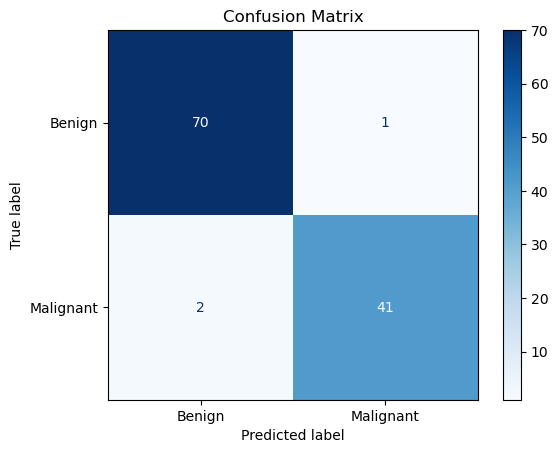

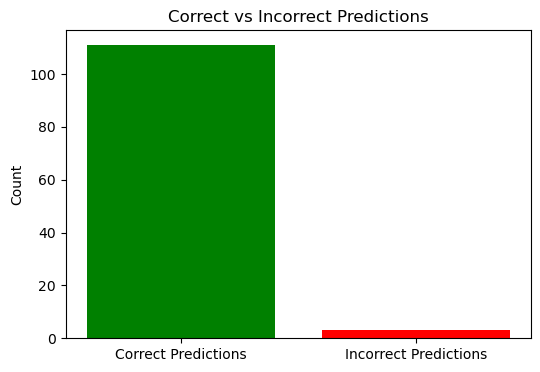

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Confusion Matrix Plot
def plot_confusion_matrix(y_test, predictions):
    """Plots the confusion matrix for predictions."""
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

    # Plot confusion matrix heatmap
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Step 2: Bar Plot for Correct and Incorrect Predictions
def plot_correct_incorrect(y_test, predicted_labels):
    """Plots a bar chart of correct and incorrect predictions."""
    correct = sum([1 for true, pred in zip(y_test, predictions) if true == pred])
    incorrect = len(y_test) - correct

    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct, incorrect], color=['green', 'red'])
    plt.title('Correct vs Incorrect Predictions')
    plt.ylabel('Count')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, predictions)

# Plot correct and incorrect predictions
plot_correct_incorrect(y_test, predictions)


## 8. User Input Data to predict either the person is diagnosed with Malignant or Benign
**Here the user provides the input for the same parameters as given below to predict and check manually either the prediction is correct or not.**

In [135]:
##Prediction Model for the input given by user
def predict_breast_cancer(model, scaler, input_data):
    try:
        # Convert whitespace-separated input to comma-separated list
        if isinstance(input_data, str):
            input_data = re.split(r'\s+', input_data)

        # Convert input data to DataFrame, excluding 'id' (input_data should have 30 features)
        if isinstance(input_data, list):
            input_data = np.array(input_data).reshape(1, -1)

        input_data = pd.DataFrame(input_data, columns=scaler.feature_names_in_)

        # Scale the input data
        scaled_data = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(scaled_data)
        probability = model.predict_proba(scaled_data).max()

        # Interpret the result
        result = 'Malignant' if prediction[0] == 1 else 'Benign'

        return result, probability

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None

In [131]:
# Example input with whitespace-separated values
example_input_whitespace = "19.81	22.15	130	1260	0.09831	0.1027	0.1479	0.09498	0.1582	0.05395	0.7582	1.017	5.865	112.4	0.006494	0.01893	0.03391	0.01521	0.01356	0.001997	27.32	30.88	186.8	2398	0.1512	0.315	0.5372	0.2388	0.2768	0.07615"

# Make the prediction
diagnosis, confidence = predict_breast_cancer(model, scaler, example_input_whitespace)

if diagnosis is not None:
    print(f"Prediction: The breast mass is {diagnosis}")
    print(f"Confidence: {confidence:.2f}")


Prediction: The breast mass is Malignant
Confidence: 1.00


## Concepts Learned while building this project 
1. What ever problem occur find the reason it may be either syntax,logical or importing problems or even not handling the edge cases ie try catch and others as well.
2. Start off with printing the dataset after importing to make sure data is imported correctly.
3. Clean up the unwanted data with null values,unwanted columns for training data such as patient id and may contain other check carefully.
4. Next is to convert into numerical values if you have to for eg i had to convert ito 0's and 1's for Malignant and Benign diagnosis.
5. Split of the diagnosis column before training dataset ie what you need to find out.
6. Build a model using effective alogrithm here i used Logistic Regression which i learned about there are others as well if you are familiar check others out.
7. Note for this project(Linear Regression won't be able to predict accurately)
8. Use Feature Scaling to achieve faster convergence that means make the preprocessing of data within certain range which helps to train data without any large bais of prediction.
9. Learnt about Scikit learn which has inbuilt modules and function which make prediction and training very easy .
10. Print accuracy and test result of the 20% dataset which was seperated before training of model.
11. Learn't about Confusion matrix which has four parts ie true positive ,true negative ,false positive and false negative remember this is same as we studied assumption of hypothesis in mathematics in 3rd sem.
    - True Positive (TP): Correctly predicted positive instances.
    - True Negative (TN): Correctly predicted negative instances.
    - False Positive (FP): Incorrectly predicted positive instances (Type I error).
    - False Negative (FN): Incorrectly predicted negative instances (Type II error).
12. Lastly created a function which takes input from user and then predict the tumor cell is either malignant or benign